In [203]:
import pandas as pd

df = pd.read_csv("./data/stage_3_out.csv")
df = df[list(df.columns)[:20]]

df_gt = pd.read_csv("./data/stage_3_ground_truth.csv")
y_true = df_gt['categoryId']

c:\users\festo\semestr x\data-exploration-project\venv\lib\site-packages\IPython\core\interactiveshell.py:3524: DtypeWarning: Columns (10,11,25,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Ground-truth label distribution


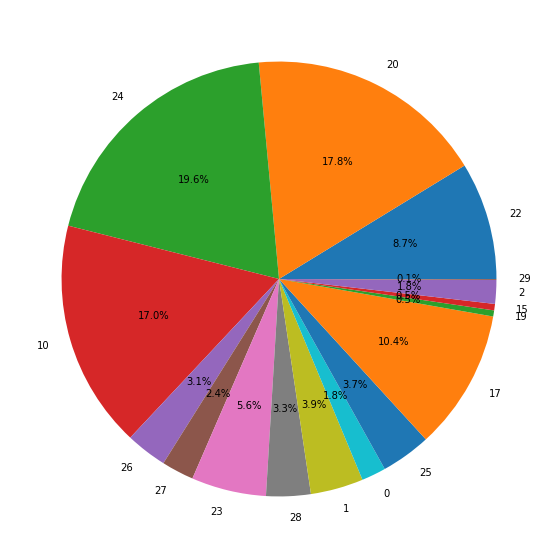

Ground-truth label distribution


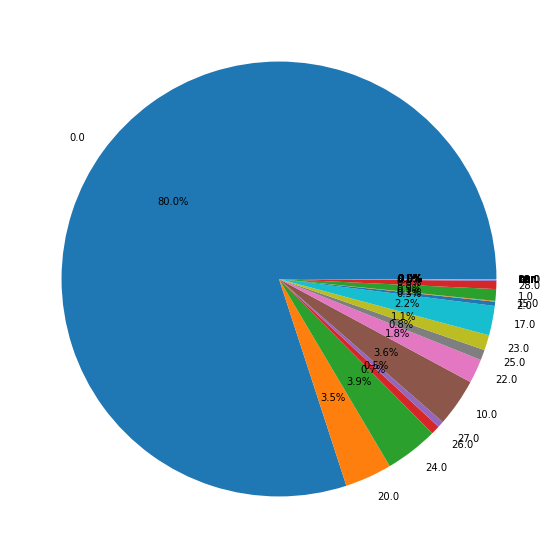

Train data w/o 0 label distribution


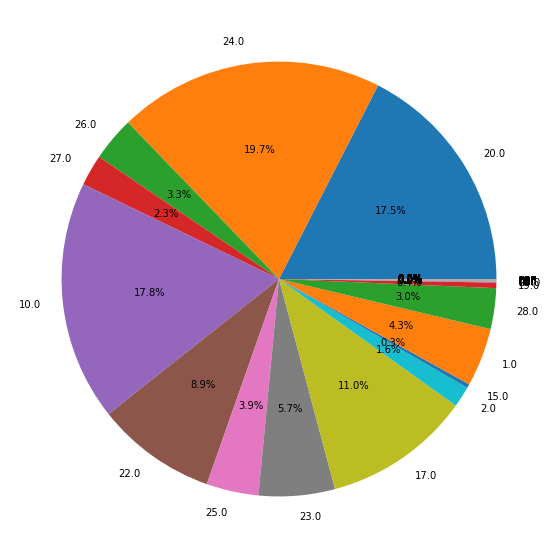

In [204]:
from matplotlib import pyplot as plt
from collections import Counter


def plot_label_distribution(df: pd.DataFrame, name: str = ' '):
    c = Counter()
    c.update(df['categoryId'])

    print(name)
    plt.figure(figsize=(10, 10))
    plt.pie(c.values(), labels=c.keys(), autopct='%1.1f%%')
    plt.show()



plot_label_distribution(df_gt, 'Ground-truth label distribution')
plot_label_distribution(df, 'Ground-truth label distribution')
plot_label_distribution(df[df.categoryId != 0], 'Train data w/o 0 label distribution')

In [205]:
from imblearn.under_sampling import RandomUnderSampler

# df_balanced = RandomUnderSampler(random_state=0).fit_resample(df)

In [219]:
import numpy as np
from sklearn.semi_supervised import LabelPropagation

df = df[:1000].dropna()

y = df['categoryId']
X = df[['view_count', 'comment_count']]

y=y.astype(int).replace(0,-1)

# X[X.isna().any(axis=1)]

print(X.shape,y.shape)
print(y.dtypes)

(1000, 2) (1000,)
int32


In [220]:
from sklearn.metrics import accuracy_score

clf = LabelPropagation(n_jobs=-1)
clf.fit(X, y)
clf.predict()
accuracy_score(y_pred)

LabelPropagation(n_jobs=-1)